## Librairies importation

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import gamma, powerlaw

## Read RMSC02 logs and get orderbook

In [2]:
stats = {}

dir_count = 0
file_count = 0

for log_dir in ["../log/rmsc02"]:
    if dir_count % 100 == 0:
        print("Completed {} directories".format(dir_count))
    dir_count += 1
    for file in sorted(os.listdir(log_dir)):  # sorted([file for file in os.listdir(log_dir) if "agent" in file.lower()]):
        if 'ORDERBOOK' in file:
            # !python ../util/formatting/convert_order_book.py -o ../data/ ../log/rmsc02/ORDERBOOK_JPM_FULL.bz2 JPM 1
            df = pd.read_csv("../data/JPM_2019-06-28_34200_57571_orderbook_1.csv", parse_dates=True, index_col="time")
        else:
            df = pd.read_pickle(os.path.join(log_dir, file), compression="bz2")
        stats[file[:-4]] = df

Completed 0 directories


In [3]:
# sorted(list(stats.keys()), key=lambda x: x.split("_")[-1])
for key in ['EXCHANGE_AGENT', 'fundamental_JPM', 'ORDERBOOK_JPM_FULL', 'summary_log', 'MARKET_MAKER_AGENT_1',
            'ZI_AGENT_2', 'HBL_AGENT_52', 'MOMENTUM_AGENT_77']:
    print(key)
    display(stats[key])

EXCHANGE_AGENT


,Event,EventType
EventTime,,
NaT,ExchangeAgent,AGENT_TYPE
2019-06-28 00:00:00.000039277,34,WHEN_MKT_CLOSE
2019-06-28 00:00:00.000039278,34,WHEN_MKT_OPEN
2019-06-28 00:00:00.000067236,98,WHEN_MKT_OPEN
2019-06-28 00:00:00.000067236,98,WHEN_MKT_CLOSE
2019-06-28 00:00:00.000067238,98,MARKET_DATA_SUBSCRIPTION_REQUEST
2019-06-28 00:00:00.000182559,28,WHEN_MKT_OPEN
2019-06-28 00:00:00.000182561,28,WHEN_MKT_CLOSE
2019-06-28 00:00:00.000258064,4,WHEN_MKT_CLOSE


fundamental_JPM


,FundamentalValue
FundamentalTime,
2019-06-28 09:30:00.000000000,100000.0
2019-06-28 09:30:00.002666427,100000.0
2019-06-28 09:30:00.004027280,100000.0
2019-06-28 09:30:00.005152407,100000.0
2019-06-28 09:30:00.005225523,100000.0
2019-06-28 09:30:00.006389664,100000.0
2019-06-28 09:30:00.007079478,100000.0
2019-06-28 09:30:00.007418809,100000.0
2019-06-28 09:30:00.007520337,100000.0


ORDERBOOK_JPM_FULL


,ask_price_1,ask_size_1,bid_price_1,bid_size_1
time,,,,
2019-06-28 09:30:00.003322332,NaN,NaN,99986.0,100.0
2019-06-28 09:30:00.004209836,NaN,NaN,99986.0,100.0
2019-06-28 09:30:00.005842539,100083.0,100.0,99986.0,100.0
2019-06-28 09:30:00.006794198,100083.0,100.0,99986.0,100.0
2019-06-28 09:30:00.007559615,100083.0,100.0,99986.0,100.0
2019-06-28 09:30:00.008713883,100046.0,100.0,99986.0,100.0
2019-06-28 09:30:00.009913500,100046.0,100.0,99986.0,100.0
2019-06-28 09:30:00.009927245,100046.0,100.0,99986.0,100.0
2019-06-28 09:30:00.010328815,100046.0,100.0,99986.0,100.0


summary_log


,AgentID,AgentStrategy,Event,EventType
0,1,MarketMakerAgent,10000000,STARTING_CASH
1,2,ZeroIntelligenceAgent,10000000,STARTING_CASH
2,3,ZeroIntelligenceAgent,10000000,STARTING_CASH
3,4,ZeroIntelligenceAgent,10000000,STARTING_CASH
4,5,ZeroIntelligenceAgent,10000000,STARTING_CASH
5,6,ZeroIntelligenceAgent,10000000,STARTING_CASH
6,7,ZeroIntelligenceAgent,10000000,STARTING_CASH
7,8,ZeroIntelligenceAgent,10000000,STARTING_CASH
8,9,ZeroIntelligenceAgent,10000000,STARTING_CASH
9,10,ZeroIntelligenceAgent,10000000,STARTING_CASH


MARKET_MAKER_AGENT_1


,Event,EventType
EventTime,,
NaT,MarketMakerAgent,AGENT_TYPE
NaT,10000000,STARTING_CASH
2019-06-28 00:00:00.000000000,{'CASH': 10000000},HOLDINGS_UPDATED
2019-06-28 09:30:51.517523868,"{'CASH': 1300, 'JPM': 100}",HOLDINGS_UPDATED
2019-06-28 09:32:48.964222431,"{'CASH': -9997400, 'JPM': 200}",HOLDINGS_UPDATED
2019-06-28 09:33:07.832167803,"{'CASH': -19796126, 'JPM': 298}",HOLDINGS_UPDATED
2019-06-28 09:34:13.941979147,"{'CASH': -29793326, 'JPM': 398}",HOLDINGS_UPDATED
2019-06-28 09:34:31.902489282,"{'CASH': -39790526, 'JPM': 498}",HOLDINGS_UPDATED
2019-06-28 09:35:01.544696380,"{'CASH': -47588342, 'JPM': 576}",HOLDINGS_UPDATED


ZI_AGENT_2


,Event,EventType
EventTime,,
NaT,ZeroIntelligenceAgent,AGENT_TYPE
NaT,10000000,STARTING_CASH
2019-06-28 00:00:00.000000000,{'CASH': 10000000},HOLDINGS_UPDATED
2019-06-28 09:30:00.008750554,"[(99986, 100)]",BID_DEPTH
2019-06-28 09:30:00.008750554,"[(100083, 100)]",ASK_DEPTH
2019-06-28 09:30:00.008750554,"[100, 100]",IMBALANCE
2019-06-28 09:56:39.790424060,"[(99884, 32)]",BID_DEPTH
2019-06-28 09:56:39.790424060,"[(99888, 351)]",ASK_DEPTH
2019-06-28 09:56:39.790424060,"[32, 351]",IMBALANCE


HBL_AGENT_52


,Event,EventType
EventTime,,
NaT,HeuristicBeliefLearningAgent,AGENT_TYPE
NaT,10000000,STARTING_CASH
2019-06-28 00:00:00.000000000,{'CASH': 10000000},HOLDINGS_UPDATED
2019-06-28 09:30:00.017102211,"[(100025, 100)]",BID_DEPTH
2019-06-28 09:30:00.017102211,"[(100030, 100)]",ASK_DEPTH
2019-06-28 09:30:00.017102211,"[100, 100]",IMBALANCE
2019-06-28 09:30:00.029390341,"{'CASH': 20002500, 'JPM': -100}",HOLDINGS_UPDATED
2019-06-28 09:36:40.693982018,"[(99964, 136)]",BID_DEPTH
2019-06-28 09:36:40.693982018,"[(99972, 187)]",ASK_DEPTH


MOMENTUM_AGENT_77


,Event,EventType
EventTime,,
NaT,MomentumAgent,AGENT_TYPE
NaT,10000000,STARTING_CASH
2019-06-28 00:00:00.000000000,{'CASH': 10000000},HOLDINGS_UPDATED
2019-06-28 09:51:38.955464419,"{'CASH': 10699580, 'JPM': -7}",HOLDINGS_UPDATED
2019-06-28 09:51:52.074154212,"{'CASH': 11399160, 'JPM': -14}",HOLDINGS_UPDATED
2019-06-28 09:52:07.185639752,"{'CASH': 12098635, 'JPM': -21}",HOLDINGS_UPDATED
2019-06-28 09:52:24.812944021,"{'CASH': 12798110, 'JPM': -28}",HOLDINGS_UPDATED
2019-06-28 09:52:57.711887452,"{'CASH': 13497585, 'JPM': -35}",HOLDINGS_UPDATED
2019-06-28 09:53:08.269203559,"{'CASH': 14197060, 'JPM': -42}",HOLDINGS_UPDATED


In [4]:
orderbook = stats['ORDERBOOK_JPM_FULL']
orderbook = orderbook[orderbook["ask_price_1"].notnull() & orderbook["bid_price_1"].notnull()]

In [5]:
orderbook = stats['ORDERBOOK_JPM_FULL']
orderbook = orderbook[orderbook["ask_price_1"].notnull() & orderbook["bid_price_1"].notnull()]
orderbook

,ask_price_1,ask_size_1,bid_price_1,bid_size_1
time,,,,
2019-06-28 09:30:00.005842539,100083.0,100.0,99986.0,100.0
2019-06-28 09:30:00.006794198,100083.0,100.0,99986.0,100.0
2019-06-28 09:30:00.007559615,100083.0,100.0,99986.0,100.0
2019-06-28 09:30:00.008713883,100046.0,100.0,99986.0,100.0
2019-06-28 09:30:00.009913500,100046.0,100.0,99986.0,100.0
2019-06-28 09:30:00.009927245,100046.0,100.0,99986.0,100.0
2019-06-28 09:30:00.010328815,100046.0,100.0,99986.0,100.0
2019-06-28 09:30:00.011245761,100046.0,100.0,99986.0,100.0
2019-06-28 09:30:00.011500042,100030.0,100.0,99986.0,100.0


## Notation and definitions

In [6]:
ask_price = orderbook["ask_price_1"]
bid_price = orderbook["bid_price_1"]
mid_price = (ask_price + bid_price) / 2

ask_size = orderbook["ask_size_1"]
bid_size = orderbook["bid_size_1"]

In [7]:
def m(t):
    return mid_price[mid_price.index <= t].values[-1]

def r(t, dt):
    return np.log(m(t + dt)) - np.log(m(t))

def S_a(t):
    return ask_size[ask_size.index <= t].values[-1]

def S_b(t):
    return bid_size[bid_size.index <= t].values[-1]

In [8]:
time = pd.date_range(
    pd.to_datetime("2019-06-28 09:30:00"), pd.to_datetime("2019-06-28 16:00:00"), freq='10S'
)
return_10s = pd.DataFrame({
    'time': time[1:], 'return': [r(t, pd.Timedelta(10, unit='s')) for t in time[1:]]
})
return_10s = return_10s.set_index('time')
return_10s

,return
time,
2019-06-28 09:30:10,0.000000
2019-06-28 09:30:20,0.000000
2019-06-28 09:30:30,0.000000
2019-06-28 09:30:40,0.000000
2019-06-28 09:30:50,0.000000
2019-06-28 09:31:00,0.000000
2019-06-28 09:31:10,0.000000
2019-06-28 09:31:20,0.000000
2019-06-28 09:31:30,0.000000


## Stylized facts about asset return distributions

### Absence of autocorrelations: $corr(r_{t + \tau, \Delta_t}, \ r_{t, \Delta_t})$

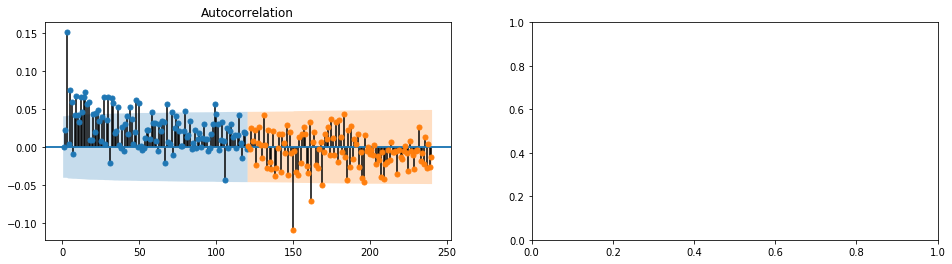

In [9]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=2)
# 1 lag = 10s
sm.graphics.tsa.plot_acf(return_10s, lags=[ind for ind in range(1, 121)], ax=ax[0])  # 0 - 20 min
sm.graphics.tsa.plot_acf(return_10s, lags=[ind for ind in range(121, 241)], ax=ax[0])  # 20 - 40 min
plt.show()

### Volatility clustering: $corr(r^2_{t + \tau, \Delta_t}, \ r^2_{t, \Delta_t})$

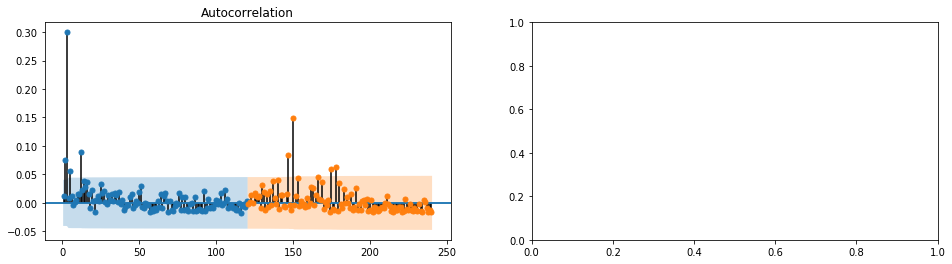

In [10]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=2)
# 1 lag = 10s
sm.graphics.tsa.plot_acf(return_10s ** 2, lags=[ind for ind in range(1, 121)], ax=ax[0])  # 0 - 20 min
sm.graphics.tsa.plot_acf(return_10s ** 2, lags=[ind for ind in range(121, 241)], ax=ax[0])  # 20 - 40 min
plt.show()

### Long range dependence: $corr(|r_{t + \tau, \Delta_t}|, \ |r_{t, \Delta_t}|) \sim \tau^{-\beta}$, $\beta \in [0.2, 0.4]$

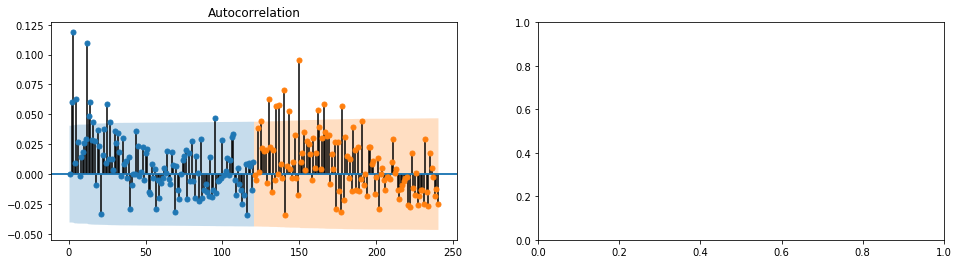

In [11]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=2)
# 1 lag = 10s
sm.graphics.tsa.plot_acf(np.abs(return_10s), lags=[ind for ind in range(1, 121)], ax=ax[0])  # 0 - 20 min
sm.graphics.tsa.plot_acf(np.abs(return_10s), lags=[ind for ind in range(121, 241)], ax=ax[0])  # 20 - 40 min
plt.show()

## Stylized facts about volumes and order flow

### Order book volumes

Where to get volumes? Only price and size...

In [12]:
ask_law = gamma.fit(ask_size.values.tolist())
bid_law = gamma.fit(bid_size.values.tolist())

Gamma law for ask: alpha = 2.640385280736857, loc = -17.996545854405127, scale = 87.62660037527047
Gamma law for bid: alpha = 2.3656367469914548, loc = -10.279405081607733, scale = 91.90572865498288


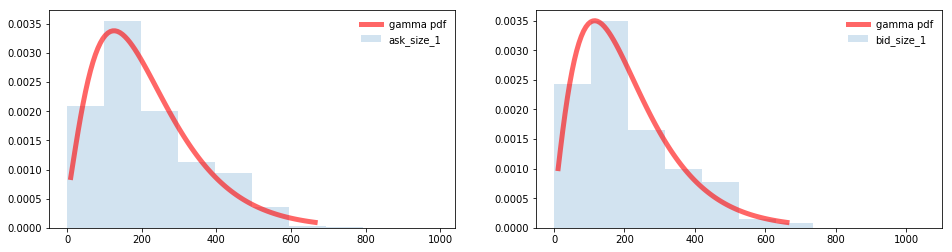

In [13]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=2)

print("Gamma law for ask: alpha = {}, loc = {}, scale = {}".format(*ask_law))
ax[0].hist(ask_size, density=True, histtype='stepfilled', alpha=0.2)
x = np.linspace(gamma.ppf(0.01, *ask_law), gamma.ppf(0.99, *ask_law), 100)
ax[0].plot(x, gamma.pdf(x, *ask_law), 'r-', lw=5, alpha=0.6, label='gamma pdf')
ax[0].legend(loc='best', frameon=False)

print("Gamma law for bid: alpha = {}, loc = {}, scale = {}".format(*bid_law))
ax[1].hist(bid_size, density=True, histtype='stepfilled', alpha=0.2)
x = np.linspace(gamma.ppf(0.01, *bid_law), gamma.ppf(0.99, *bid_law), 100)
ax[1].plot(x, gamma.pdf(x, *bid_law), 'r-', lw=5, alpha=0.6, label='gamma pdf')
ax[1].legend(loc='best', frameon=False)

plt.show()

### Order sizes

It clearly does not fit to a powerlaw distribution, looks like a gamma as above...

In [14]:
ask_law = powerlaw.fit(ask_size.values.tolist())
bid_law = powerlaw.fit(bid_size.values.tolist())

Powerlaw law for ask: alpha = 0.5615961624896404, loc = 0.9999999999999956, scale = 992.3659016342322
Powerlaw law for bid: alpha = 0.5186267829496659, loc = 0.9999999999999949, scale = 1047.7862171924726


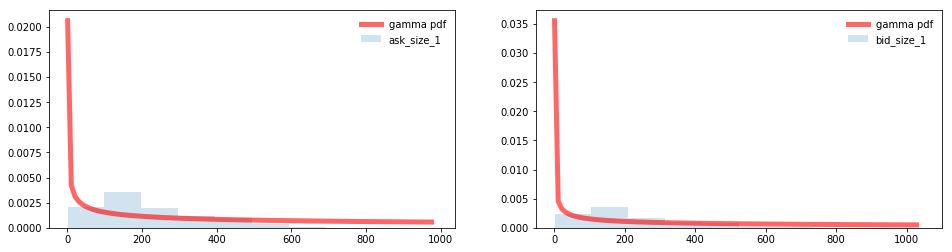

In [15]:
fig, ax = plt.subplots(figsize=(16, 4), ncols=2)

print("Powerlaw law for ask: alpha = {}, loc = {}, scale = {}".format(*ask_law))
ax[0].hist(ask_size, density=True, histtype='stepfilled', alpha=0.2)
x = np.linspace(powerlaw.ppf(0.01, *ask_law), powerlaw.ppf(0.99, *ask_law), 100)
ax[0].plot(x, powerlaw.pdf(x, *ask_law), 'r-', lw=5, alpha=0.6, label='gamma pdf')
ax[0].legend(loc='best', frameon=False)

print("Powerlaw law for bid: alpha = {}, loc = {}, scale = {}".format(*bid_law))
ax[1].hist(bid_size, density=True, histtype='stepfilled', alpha=0.2)
x = np.linspace(powerlaw.ppf(0.01, *bid_law), powerlaw.ppf(0.99, *bid_law), 100)
ax[1].plot(x, powerlaw.pdf(x, *bid_law), 'r-', lw=5, alpha=0.6, label='gamma pdf')
ax[1].legend(loc='best', frameon=False)

plt.show()

### Number of orders in a fixed time window

In [16]:
orderbook.resample("5T")["ask_price_1"].count()

time
2019-06-28 09:30:00    139
2019-06-28 09:35:00     71
2019-06-28 09:40:00     77
2019-06-28 09:45:00     40
2019-06-28 09:50:00    297
2019-06-28 09:55:00    410
2019-06-28 10:00:00    261
2019-06-28 10:05:00    407
2019-06-28 10:10:00    371
2019-06-28 10:15:00    349
2019-06-28 10:20:00    235
2019-06-28 10:25:00    311
2019-06-28 10:30:00    323
2019-06-28 10:35:00    229
2019-06-28 10:40:00    376
2019-06-28 10:45:00    282
2019-06-28 10:50:00    312
2019-06-28 10:55:00    399
2019-06-28 11:00:00    253
2019-06-28 11:05:00    378
2019-06-28 11:10:00    414
2019-06-28 11:15:00    408
2019-06-28 11:20:00    411
2019-06-28 11:25:00    321
2019-06-28 11:30:00    373
2019-06-28 11:35:00    411
2019-06-28 11:40:00    318
2019-06-28 11:45:00    320
2019-06-28 11:50:00    379
2019-06-28 11:55:00    518
                      ... 
2019-06-28 13:30:00    414
2019-06-28 13:35:00    211
2019-06-28 13:40:00    316
2019-06-28 13:45:00    344
2019-06-28 13:50:00    375
2019-06-28 13:55:00    